# Audio Processing

## The Pianist

### The Code

In [73]:

import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
from scipy.fftpack import fft

In [74]:
# Song generation
def song(N: int, t: np.ndarray, a1: list[float], a2: list[float], t_i: list[float], T_i: list[float], f1: list[float], f2: list[float]) -> np.ndarray:
    assert len(a1) == len(a2) == len(t_i) == len(T_i) == len(f1) == len(f2) == N, "Invalid input"
    signal: np.ndarray  = np.zeros(t.shape)
    
    for i in range(N):
        wave1 = a1[i] * np.sin(2 * np.pi * f1[i] * t)
        wave2 = a2[i] * np.sin(2 * np.pi * f2[i] * t)
        wave = wave1 + wave2
        unit_step = ((t >= t_i[i]) & (t <= T_i[i]))
        signal += wave * unit_step
        
    return signal

# Converting from time domain to frequency domain
def to_freq_domain(signal: np.ndarray, N: int) -> np.ndarray:
    signal = fft(signal)
    signal = 2/N * np.abs(signal[0:N//2])
    return signal

In [75]:
songDuration: int = 6
t: np.ndarray = np.linspace(0, songDuration, 24 * 1024)

In [76]:
x: np.ndarray = song(14,
                t,
                [1]*14,
                [1]*14,
                [0.00, 0.33, 0.81, 1.14, 1.62, 1.95, 2.43, 3.02, 3.35, 3.83, 4.16, 4.64, 4.97, 5.45], 
                [0.21, 0.69, 1.02, 1.50, 1.83, 2.31, 2.90, 3.23, 3.71, 4.04, 4.52, 4.85, 5.33, 5.92], 
                [0, 0, 293.66, 293.66, 329.63, 329.63, 293.66, 261.63, 261.63, 0, 0, 0, 0, 0],
                [196, 196, 0, 0, 0, 0, 0, 0, 0, 246.93, 246.93, 220, 220, 196]
                )

### Let's Play

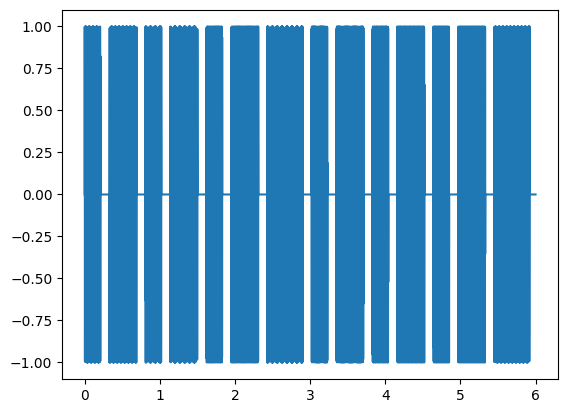

In [85]:
plt.plot(t, x)
sd.play(x, 4 * 1024)

---

## Noise Cancellation

In [78]:
N: int = songDuration * 1024
f: np.ndarray = np.linspace(0, 512, N//2)

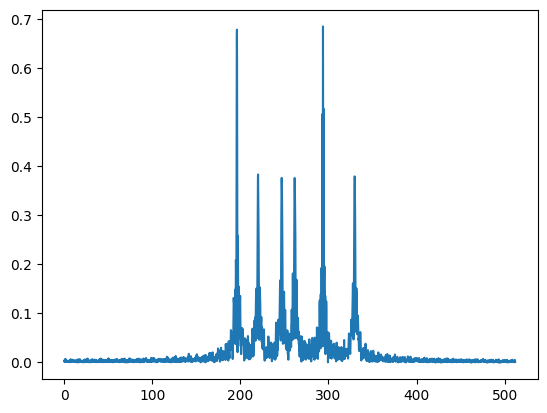

In [79]:
x_f: np.ndarray = to_freq_domain(x, N)
plt.plot(f, x_f)

In [80]:
rand_f1, rand_f2 = np.random.randint(0, 512, 2)
n: np.ndarray = np.sin(2 * rand_f1 * np.pi * t) + np.sin(2 * rand_f2 * np.pi * t)
print(rand_f1, rand_f2)

308 354


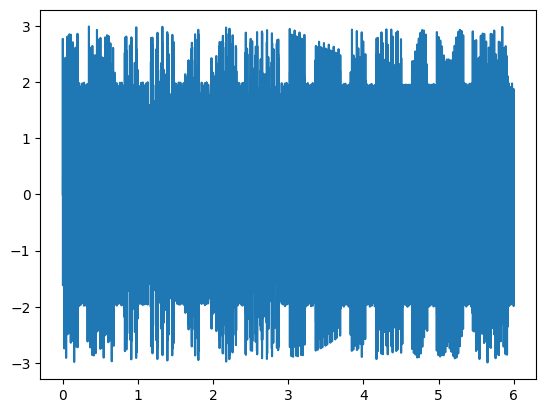

In [81]:
x_n: np.ndarray = x + n
plt.plot(t, x_n)
sd.play(x_n, 4 * 1024)

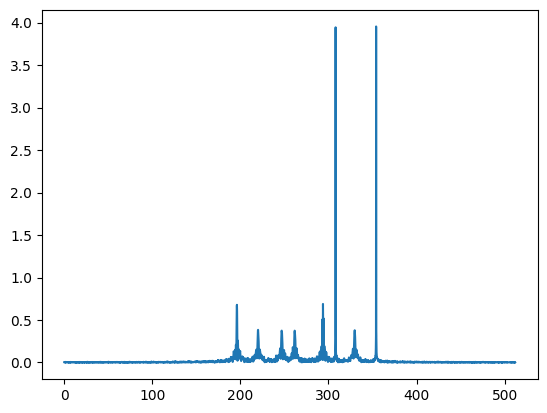

In [82]:
x_n_f: np.ndarray = to_freq_domain(x_n, N)
plt.plot(f, x_n_f)

In [83]:
f1, f2 = f[np.argsort(x_n_f)[-2:]]
f1, f2 = int(f1), int(f2)
print(f1, f2)

308 354


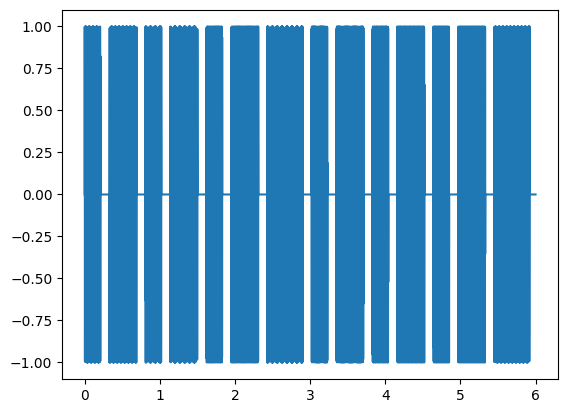

In [84]:
x_filtered: np.ndarray = x_n - np.sin(2 * f1 * np.pi * t) - np.sin(2 * f2 * np.pi * t)
plt.plot(t, x_filtered)
sd.play(x_filtered, 4 * 1024)